In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [15]:
df=pd.read_csv('B:/train.csv')

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.shape

(891, 12)

In [18]:
df1=df.dropna()

In [19]:
df1.shape

(183, 12)

In [21]:
print(pd.isnull(df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Percentage of females who survived : 74.20382165605095
Percentage of females who survived : 18.890814558058924


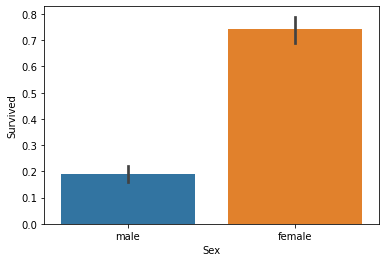

In [22]:
sns.barplot(x='Sex', y='Survived', data=df)
print("Percentage of females who survived :",df['Survived'][df['Sex']=='female'].value_counts(normalize= True)[1]*100)
print("Percentage of females who survived :",df['Survived'][df['Sex']=='male'].value_counts(normalize= True)[1]*100)

percenteage of Pclas =1 who survived: 62.96296296296296
percenteage of Pclas =2 who survived: 47.28260869565217
percenteage of Pclas =3 who survived: 24.236252545824847


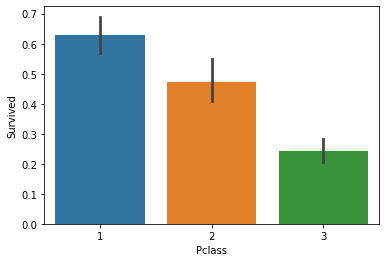

In [26]:
sns.barplot(x='Pclass', y="Survived", data=df)
print('percenteage of Pclas =1 who survived:',df['Survived'][df['Pclass']==1].value_counts(normalize=True)[1]*100)
print('percenteage of Pclas =2 who survived:',df['Survived'][df['Pclass']==2].value_counts(normalize=True)[1]*100)
print('percenteage of Pclas =3 who survived:',df['Survived'][df['Pclass']==3].value_counts(normalize=True)[1]*100)

percenteage of SibSp =0 who survived: 34.53947368421053
percenteage of SibSp =1 who survived: 53.588516746411486
percenteage of SibSp =2 who survived: 46.42857142857143


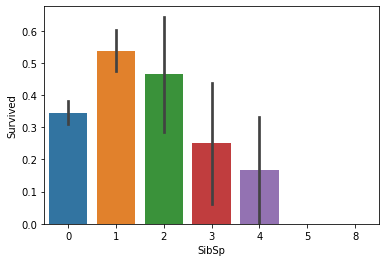

In [38]:
sns.barplot(x='SibSp', y="Survived", data=df)
print('percenteage of SibSp =0 who survived:',df['Survived'][df['SibSp']==0].value_counts(normalize=True)[1]*100)
print('percenteage of SibSp =1 who survived:',df['Survived'][df['SibSp']==1].value_counts(normalize=True)[1]*100)
print('percenteage of SibSp =2 who survived:',df['Survived'][df['SibSp']==2].value_counts(normalize=True)[1]*100)

<AxesSubplot:ylabel='Age'>

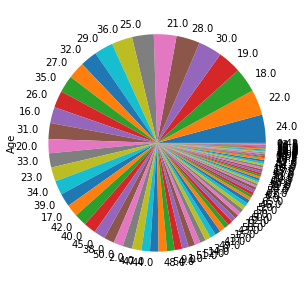

In [42]:
plt.figure(figsize=(5,5))
df.Age.value_counts().plot(kind='pie')

percenteage of CabinBool =0 who survived: 29.985443959243085
percenteage of CabinBool =1 who survived: 66.66666666666666


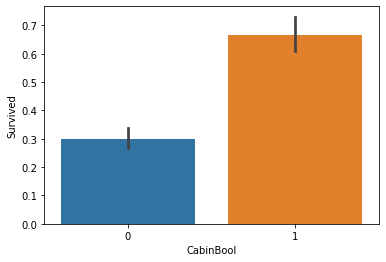

In [44]:
df['CabinBool']=(df['Cabin'].notnull().astype('int'))
sns.barplot(x='CabinBool', y="Survived", data=df)
print('percenteage of CabinBool =0 who survived:',df['Survived'][df['CabinBool']==0].value_counts(normalize=True)[1]*100)
print('percenteage of CabinBool =1 who survived:',df['Survived'][df['CabinBool']==1].value_counts(normalize=True)[1]*100)


In [46]:
df.shape

(891, 13)

In [66]:
data=df.dropna()

In [67]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [68]:
data=data.drop(['Embarked','Name','Cabin','Ticket'], axis=1)


In [69]:
data['Sex']=data['Sex'].map({'male':0,'female':1})

In [70]:
X_train,X_test, y_train, y_test=train_test_split(data.drop(['Survived'], axis=1), data['Survived'], test_size=0.20,random_state=8)

In [71]:
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)


B:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
predictions=logmodel.predict(X_test)
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool
809,810,1,1,33.0,1,0,53.1000,1
137,138,1,0,37.0,1,0,53.1000,1
496,497,1,1,54.0,1,0,78.2667,1
659,660,1,0,58.0,0,2,113.2750,1
3,4,1,1,35.0,1,0,53.1000,1


In [73]:
accuracy=logmodel.score(X_test,y_test)
print(accuracy*100)

81.08108108108108


In [74]:
predictions

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.91      0.85        22

    accuracy                           0.81        37
   macro avg       0.82      0.79      0.80        37
weighted avg       0.81      0.81      0.81        37



In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[10,  5],
       [ 2, 20]], dtype=int64)